In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# set axis lines to light gray
plt.rcParams["axes.edgecolor"] = "lightgray"
# tick labels to dark gray
plt.rcParams["ytick.color"] = "dimgrey"
plt.rcParams["xtick.color"] = "dimgrey"

# set grid on
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "lightgray"
# line below
plt.rcParams["axes.axisbelow"] = True
# dashed line
plt.rcParams["grid.linestyle"] = "--"

Loading data

In [2]:
df_bow_agency = pl.scan_csv("../data/vocabulary/bow_matrix_agency.csv")
df_tfidf = pl.scan_csv("../data/vocabulary/tfidf_matrix.csv")

df_bow_act_class = pl.scan_csv("../data/vocabulary/bow_matrix_type.csv").rename({"type": "tipo_ato"})

df_act_type = pl.scan_csv("../data/vocabulary/bow_matrix_label.csv")

In [3]:
df_bow_agency.head(3).collect()

agency,__,___,____,______,__________,___________,______________________,_______________________________,___________________________________________________________iii,_bm_fza_,_cabo_frio,_geração,aa,aaaa,aaaammdd,aabnt,aagraben,aai,aalienação,aaoel,aap,aaprovação,aarão,aas,ab,aba,abac,abacate,abacaxi,abadiânia,abafarmaxii,abaixador,abaixamento,abaixo,abaixoiii,abalroamento,…,óxidos,ômega,ônibus,ônus,ônustransferências,ões,úlceras,última,últimas,último,últimos,úmida,úmido,úmidos,únicas,únicos,úrico,úteis,úteisaplica,úteisdeverá,úteisi,útero,útil,útilcaso,útildisposto,μg,μm,μmpode,μs,μsii,μt,ﬁm,ﬁnal,ﬁzerem,ﬂange,ﬂuvial,ﬂuxo
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""ANA""",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,…,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""ANATEL""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,…,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""ANCINE""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,…,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
bow_cols_select = pl.exclude("agency", "tipo_ato", "label")

In [5]:
df_tfidf_bin = df_tfidf.with_columns(
    pl.when(bow_cols_select > 0)
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .name.keep()
)

df_bow_bin = df_bow_agency.with_columns(
    pl.when(bow_cols_select > 0)
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .name.keep()
)

df_act_type_bin = df_act_type.with_columns(
    pl.when(bow_cols_select > 0)
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .name.keep()
)

df_bow_bin.head(2).collect()

agency,__,___,____,______,__________,___________,______________________,_______________________________,___________________________________________________________iii,_bm_fza_,_cabo_frio,_geração,aa,aaaa,aaaammdd,aabnt,aagraben,aai,aalienação,aaoel,aap,aaprovação,aarão,aas,ab,aba,abac,abacate,abacaxi,abadiânia,abafarmaxii,abaixador,abaixamento,abaixo,abaixoiii,abalroamento,…,óxidos,ômega,ônibus,ônus,ônustransferências,ões,úlceras,última,últimas,último,últimos,úmida,úmido,úmidos,únicas,únicos,úrico,úteis,úteisaplica,úteisdeverá,úteisi,útero,útil,útilcaso,útildisposto,μg,μm,μmpode,μs,μsii,μt,ﬁm,ﬁnal,ﬁzerem,ﬂange,ﬂuvial,ﬂuxo
str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,…,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""ANA""",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,…,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""ANATEL""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,…,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_act_type_bin.head(2).collect()

label,__,___,____,______,__________,___________,______________________,_______________________________,___________________________________________________________iii,_bm_fza_,_cabo_frio,_geração,aa,aaaa,aaaammdd,aabnt,aagraben,aai,aalienação,aaoel,aap,aaprovação,aarão,aas,ab,aba,abac,abacate,abacaxi,abadiânia,abafarmaxii,abaixador,abaixamento,abaixo,abaixoiii,abalroamento,…,óxidos,ômega,ônibus,ônus,ônustransferências,ões,úlceras,última,últimas,último,últimos,úmida,úmido,úmidos,únicas,únicos,úrico,úteis,úteisaplica,úteisdeverá,úteisi,útero,útil,útilcaso,útildisposto,μg,μm,μmpode,μs,μsii,μt,ﬁm,ﬁnal,ﬁzerem,ﬂange,ﬂuvial,ﬂuxo
str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,…,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""abstrata""",1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
"""concreta""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,1,0,0,…,0,1,0,1,0,1,0,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0


In [7]:
agency_unique_voc = df_bow_bin.select(
    "agency",
    pl.when(bow_cols_select.sum().eq(1))
    .then(bow_cols_select)
    .otherwise(pl.lit(0)),
)

act_type_uniq_voc = df_act_type_bin.select(
    pl.col("label"),
    pl.when(bow_cols_select.sum().eq(1))
    .then(bow_cols_select)
    .otherwise(pl.lit(0)),
)

In [8]:
tfidf_voc_size = df_tfidf_bin.select(
    "agency",
    pl.sum_horizontal(bow_cols_select).alias(
        "vocabulary size"
    ),
).collect()

tfidf_uniq_voc_size = df_tfidf_bin.select(
    "agency",
    pl.sum_horizontal(
        pl.when(bow_cols_select.sum().eq(1))
        .then(bow_cols_select)
        .otherwise(pl.lit(0))
    ).alias("unique vocabulary size"),
).collect()

bow_voc_size = df_bow_bin.select(
    "agency",
    pl.sum_horizontal(bow_cols_select).alias(
        "vocabulary size"
    ),
).collect()

bow_uniq_voc_size = agency_unique_voc.select(
    "agency",
    pl.sum_horizontal(
        bow_cols_select
    ).alias("unique vocabulary size"),
).collect()


type_act_voc_size = df_act_type_bin.select(
    "label",
    pl.sum_horizontal(bow_cols_select).alias(
        "vocabulary size"
    ),
).collect()

type_act_uniq_voc_size = act_type_uniq_voc.select(
    "label",
    pl.sum_horizontal(
        bow_cols_select
    ).alias("unique vocabulary size"),
).collect()


bow_voc = (
    bow_voc_size.join(bow_uniq_voc_size, on="agency")
    .sort("vocabulary size", descending=True)
    .with_columns(
        (pl.col("unique vocabulary size") / pl.col("vocabulary size") * 100).alias(
            "uniq_voc_percent"
        )
    )
)
tfidf_voc = tfidf_voc_size.join(tfidf_uniq_voc_size, on="agency").sort(
    "vocabulary size", descending=True
)

type_act_voc = (
    type_act_voc_size.join(type_act_uniq_voc_size, on="label")
    .sort("vocabulary size", descending=True)
    .with_columns(
        (pl.col("unique vocabulary size") / pl.col("vocabulary size") * 100).alias(
            "uniq_voc_percent"
        )
    )
)

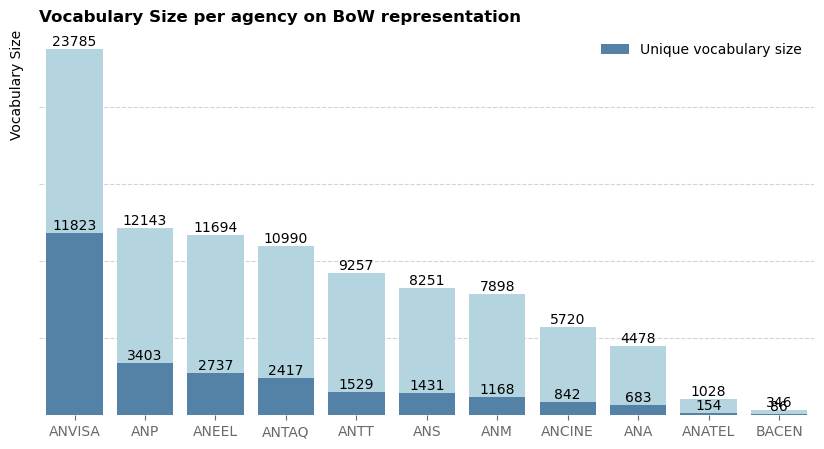

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    x="agency",
    y="vocabulary size",
    data=bow_voc,
    # label="Vocabulary size",
    color="lightblue",
    ax=ax,
)

sns.barplot(
    x="agency",
    y="unique vocabulary size",
    data=bow_voc,
    label="Unique vocabulary size",
    color="steelblue",
    ax=ax,
)

ax.set_title(
    "Vocabulary Size per agency on BoW representation", loc="left", weight="bold"
)
ax.set_ylabel("Vocabulary Size", loc="top")
ax.set_xlabel("")
ax.legend(frameon=False)

# add value labels
for cont in ax.containers:
    ax.bar_label(cont, label_type="edge")

sns.despine(left=True, bottom=True)
ax.set_yticklabels("")
# remove yticks
ax.yaxis.set_ticks_position("none")

fig.savefig("../data/analysis/agency_voc_size.png", dpi=300, bbox_inches="tight")
fig.savefig("../data/analysis/agency_voc_size.pdf", dpi=300, bbox_inches="tight")

C:\Users\jlnun\AppData\Local\Temp\ipykernel_19524\2588526208.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


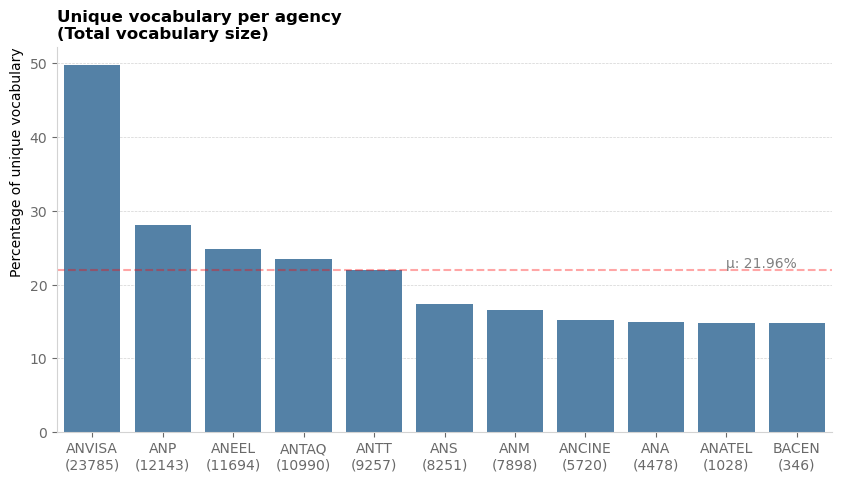

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    x="agency",
    y="uniq_voc_percent",
    data=bow_voc.sort("uniq_voc_percent", descending=True),
    color="steelblue",
    ax=ax,
)

# add -- line with the mean
ax.axhline(
    bow_voc["uniq_voc_percent"].mean(),
    color="red",
    linestyle="--",
    zorder=1,
    alpha=0.35,
)
# annotate median
ax.text(
    10,
    bow_voc["uniq_voc_percent"].mean(),
    f"μ: {bow_voc['uniq_voc_percent'].mean():.2f}%",
    color="black",
    alpha=0.5,
    ha="right",
    va="bottom",
    fontsize=10,
)

ax.set_title(
    "Unique vocabulary per agency\n(Total vocabulary size)", loc="left", weight="bold"
)
ax.set_ylabel("Percentage of unique vocabulary", loc="top")
ax.set_xlabel("")

# add TOTAL vocabulary size to xticklabels
ax.set_xticklabels(
    bow_voc.select(
        pl.col("agency") + "\n(" + pl.col("vocabulary size").cast(pl.Utf8) + ")"
    )
    .to_series()
    .to_list()
)

sns.despine(ax=ax)
# add lightgray gridlines behind bars
ax.set_axisbelow(True)
ax.yaxis.grid(color="lightgray", linestyle="--", linewidth=0.5)
fig.savefig("../data/plots/agency_uniq_voc.png", dpi=300, bbox_inches="tight")
fig.savefig("../data/plots/agency_uniq_voc.pdf", dpi=300, bbox_inches="tight")

In [11]:
from scipy.stats import pearsonr 
pearsonr(bow_voc["vocabulary size"], bow_voc["uniq_voc_percent"])

PearsonRResult(statistic=np.float64(0.7985102382242959), pvalue=np.float64(0.003208654041905127))

In [14]:
# fig, ax = plt.subplots(figsize=(10, 5))

# sns.barplot(
#     y="tipo_ato",
#     x="uniq_voc_percent",
#     data=tipo_ato_bow_voc.select(
#         "tipo_ato",
#         (pl.col("unique vocabulary size") / pl.col("vocabulary size") * 100).alias(
#             "uniq_voc_percent"
#         ),
#     ),
#     color="steelblue",
#     ax=ax,
# )

# ax.set_title(
#     "Unique vocabulary per document type\n(Total vocabulary size)",
#     loc="left",
#     weight="bold",
# )
# ax.set_xlabel("Percentage of unique vocabulary", loc="left")
# ax.set_ylabel("")

# # add total vocabulary size to yticklabels
# ax.set_yticklabels(
#     tipo_ato_bow_voc.select(
#         pl.col("tipo_ato") + "\n(" + pl.col("vocabulary size").cast(pl.Utf8) + ")"
#     )
#     .to_series()
#     .to_list(),
#     ha="right",
# )

# sns.despine(ax=ax)
# ax.set_axisbelow(True)
# ax.yaxis.grid(color="lightgray", linestyle="--", linewidth=0.5)
# fig.savefig("act_class_uniq_voc.png", dpi=300, bbox_inches="tight")
# fig.savefig("act_class_uniq_voc.pdf", dpi=300, bbox_inches="tight")

# Abstract X Concrete

C:\Users\jlnun\AppData\Local\Temp\ipykernel_19524\694512955.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


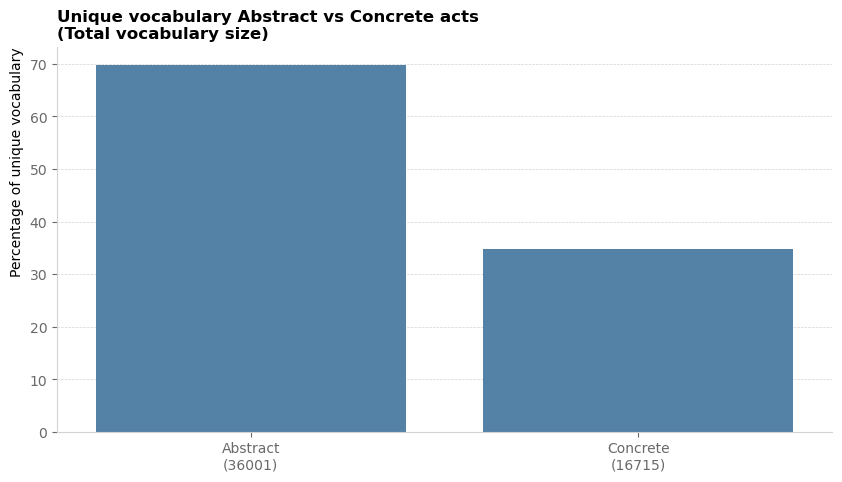

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    x="label",
    y="uniq_voc_percent",
    data=type_act_voc,
    # label="Vocabulary size",
    color="steelblue",
    ax=ax,
)

ax.set_title(
    "Unique vocabulary Abstract vs Concrete acts\n(Total vocabulary size)",
    loc="left",
    weight="bold",
)
ax.set_ylabel("Percentage of unique vocabulary", loc="top")
ax.set_xlabel("")

# add total vocabulary size to xticklabels
ax.set_xticklabels(
    type_act_voc.select(
        pl.col("label").replace({"abstrata": "Abstract", "concreta": "Concrete"})
        + "\n("
        + pl.col("vocabulary size").cast(pl.Utf8)
        + ")"
    )
    .to_series()
    .to_list()
)

sns.despine(ax=ax)
ax.set_axisbelow(True)
ax.yaxis.grid(color="lightgray", linestyle="--", linewidth=0.5)
fig.savefig("../data/plots/act_type_voc.png", dpi=300, bbox_inches="tight")
fig.savefig("../data/plots/act_type_voc.pdf", dpi=300, bbox_inches="tight")

In [16]:
df_bow = pl.scan_csv("../data/vocabulary/bow_matrix.csv").select(pl.exclude("agency", "",))
df_dados = pl.scan_csv("dados.csv").select(pl.exclude("text", "publication_type", "",))

df_acts = pl.concat(
    [
        df_dados,
        df_bow,
    ],
    how="horizontal",
).rename({"labels": "type_act"})

In [17]:
df_acts.select(pl.col("type_act").value_counts()).unnest("type_act").collect()

type_act,count
str,u32
"""abstrata""",3596
"""concreta""",4959


Unique voc per agency.

In [19]:
col_exclude = pl.exclude("agency", "type_act", "label", "type")
voc_cols = df_acts.select(col_exclude).collect_schema().names()

act_uniq_agency = df_acts.join(
    agency_unique_voc,
    on="agency",
).select(
    "agency",
    # vector multiplication to count uniq word count
    pl.sum_horizontal([pl.col(col) * pl.col(f"{col}_right") for col in voc_cols]).alias(
        "agency_voc_usage"
    ),
    word_count=pl.sum_horizontal(voc_cols),
)  # .collect()

act_uniq_label = df_acts.join(
    act_type_uniq_voc.rename({"label": "type_act"}),
    on="type_act",
).select(
    "type_act",
    pl.sum_horizontal([pl.col(col) * pl.col(f"{col}_right") for col in voc_cols]).alias(
        "label_voc_usage"
    ),
)  # .collect()

df_uniq_voc_usage = (
    pl.concat(
        [
            act_uniq_agency,
            act_uniq_label,
        ],
        how="horizontal",
    )
    .with_columns(
        non_agency_voc_usage=pl.col("word_count") - pl.col("agency_voc_usage"),
        non_label_voc_usage=pl.col("word_count") - pl.col("label_voc_usage"),
    )
    .collect()
)

In [20]:
act_uniq_label.collect()

type_act,label_voc_usage
str,i64
"""concreta""",2
"""concreta""",3
"""concreta""",5
"""concreta""",3
"""concreta""",3
…,…
"""concreta""",0
"""concreta""",0
"""concreta""",6


In [21]:
df_uniq_voc_usage = df_uniq_voc_usage.select(
    "agency",
    "type_act",
    "word_count",
    "agency_voc_usage",
    "non_agency_voc_usage",
    "label_voc_usage",
    "non_label_voc_usage",
    percent_agency_voc_usage = (pl.col("agency_voc_usage") / pl.col("word_count") * 100),
    percent_label_voc_usage = (pl.col("label_voc_usage") / pl.col("word_count") * 100),
)

df_uniq_voc_usage.describe()

statistic,agency,type_act,word_count,agency_voc_usage,non_agency_voc_usage,label_voc_usage,non_label_voc_usage,percent_agency_voc_usage,percent_label_voc_usage
str,str,str,f64,f64,f64,f64,f64,f64,f64
"""count""","""8555""","""8555""",8555.0,8555.0,8555.0,8555.0,8555.0,8555.0,8555.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,104.875278,5.500526,99.374752,6.602805,98.272472,NaN,NaN
"""std""",null,null,223.655147,21.295423,208.342748,27.723518,208.0681,NaN,NaN
"""min""","""ANA""","""abstrata""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",null,null,28.0,0.0,27.0,0.0,26.0,0.0,0.0
"""50%""",null,null,44.0,1.0,43.0,2.0,42.0,1.886792,3.731343
"""75%""",null,null,84.0,3.0,81.0,5.0,77.0,5.232558,8.571429
"""max""","""BACEN""","""concreta""",4395.0,401.0,4395.0,746.0,4395.0,60.557769,70.512821


In [22]:
df_uniq_voc_usage.group_by(
    "type_act"
).agg(pl.col("word_count").mean())

type_act,word_count
str,f64
"""concreta""",98.182698
"""abstrata""",114.104561


<Axes: xlabel='percent_agency_voc_usage', ylabel='agency'>

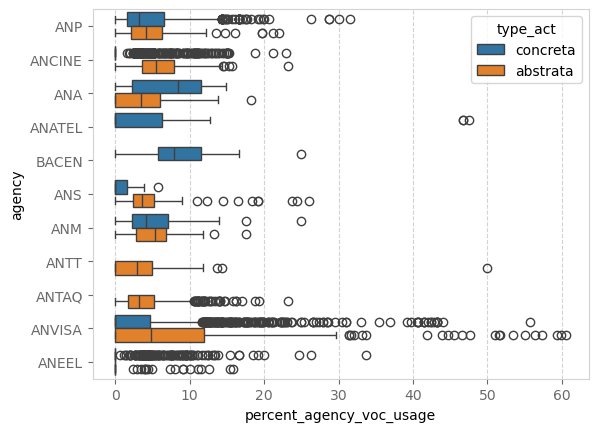

In [26]:
sns.boxplot(
    y="agency",
    x="percent_agency_voc_usage",
    hue="type_act",
    data=df_uniq_voc_usage,
)

<Axes: xlabel='percent_label_voc_usage', ylabel='agency'>

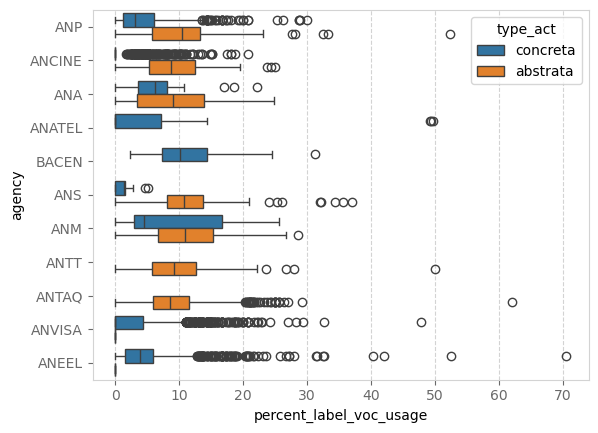

In [24]:
sns.boxplot(
    y="agency",
    x="percent_label_voc_usage",
    hue="type_act",
    data=df_uniq_voc_usage,
)